### O SVM será utilizado para criação de *classificador* que identifica possíveis músicas que um usuário poderia gostar

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
dataset= pd.read_csv('/home/amador/dados/data.csv', sep=',')

In [3]:
dataset.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


### Análise de Dados

In [4]:
#Checando valores Missing
dataset.isnull().sum()

id                  0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [5]:
# contando valores únicos da variável alvo
dataset.target.unique()

array([1, 0])

In [6]:
# Resumo Estatístico da base
# Somente dados numéricos
dataset.describe()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [7]:
# Resumo Estatístico da base
# Somente não-dados numéricos
dataset.describe(include=['O'])
# letra 'o' maiúscula

,song_title,artist
count,2017,2017
unique,1956,1343
top,River,Drake
freq,3,16


In [8]:
# lista estilos disponíveis do Matplotlib
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<IPython.core.display.Javascript object>


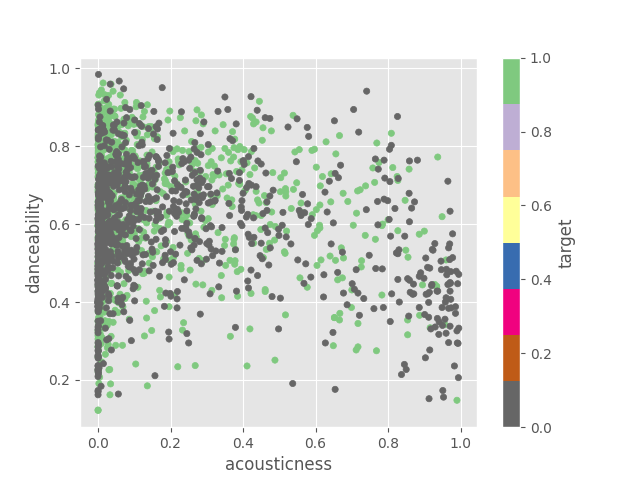

In [9]:
%matplotlib notebook
style.use("seaborn-colorblind")
dataset.plot(x='acousticness', y='danceability', c='target', kind='scatter', colormap='Accent_r');

<IPython.core.display.Javascript object>


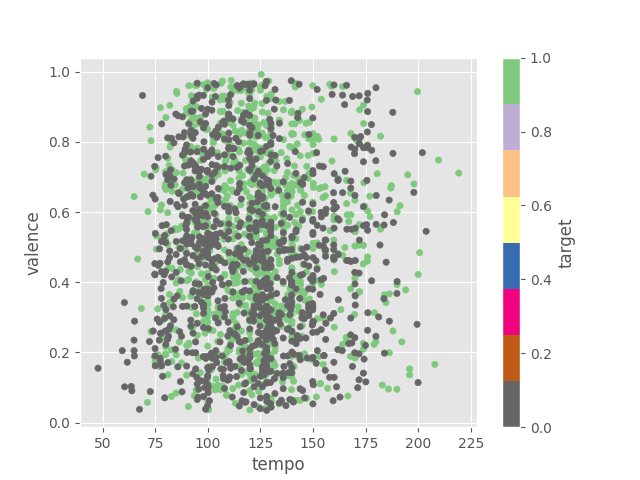

In [10]:
%matplotlib notebook
style.use("seaborn-colorblind")
dataset.plot(x='tempo', y='valence', c='target', kind='scatter' , colormap='Accent_r');

<IPython.core.display.Javascript object>


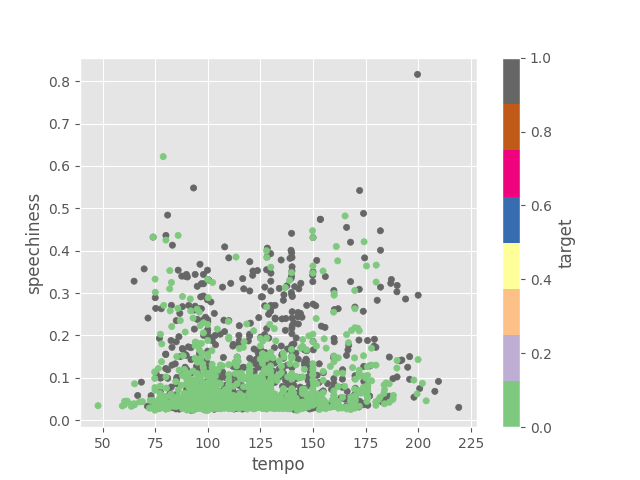

In [11]:
%matplotlib notebook
style.use("seaborn-colorblind")
dataset.plot(x='tempo', y='speechiness', c='target', kind='scatter' , colormap='Accent');

<IPython.core.display.Javascript object>


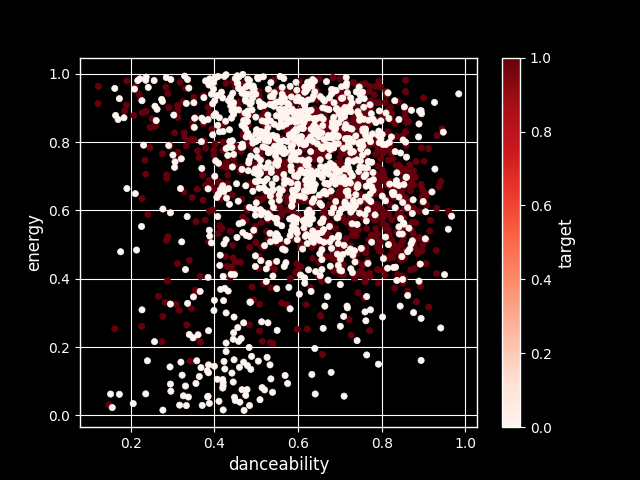

In [12]:
%matplotlib notebook
style.use('dark_background')
dataset.plot(x='danceability', y='energy', c='target', kind='scatter' , colormap='Reds');

### Pré-processamento

In [13]:
classes = dataset['target']
dataset.drop('target', axis=1, inplace=True) # dataset terá todos os dados, exceto o target(classes)

In [14]:
# criando função pra remover coluna sempre que necessário

def remove_features(lista_features):
    for i in lista_features:
        dataset.drop(i, axis=1, inplace=True)
    return 'OK'

In [15]:
# Removendo features não-representativas
remove_features(['id','song_title'])

'OK'

In [16]:
dataset.head(3)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.159,-7.148,1,0.2890,75.044,4.0,0.173,Future


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  artist            2017 non-null   object 
dtypes: float64(10), int64(3), object(1)
memory usage: 220.7+ KB


**Label Encoder**

In [18]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
# inteiros recebe a coluna 'artist' transformada
inteiros = enc.fit_transform(dataset['artist'])
#tipo da coluna
type(dataset['artist']),type(inteiros)

(pandas.core.series.Series, numpy.ndarray)

In [19]:
# Visualizando valores únicos
set(inteiros)
#array não suporta o unique

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [20]:
# Cria uma nova coluna chamada 'artist_inteiros'
dataset['artist_inteiros'] = inteiros

In [21]:
# fazendo copia do dataset com a feature artist categórico
dataset_com_artist=dataset.copy()
#removendo artista
remove_features(['artist'])

'OK'

In [22]:
dataset_com_artist.head(3)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,Future,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.159,-7.148,1,0.2890,75.044,4.0,0.173,Future,449


In [23]:
dataset.head(3) # não tem mais a feature artist

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.159,-7.148,1,0.2890,75.044,4.0,0.173,449


**One Hot Encoding**

In [24]:
# importando o pacote OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instanciando um objeto do tipo OnehotEncoder
ohe = OneHotEncoder()

In [25]:
# essa função pega todos os valores como array
dataset.values

array([[1.02000e-02, 8.33000e-01, 2.04600e+05, ..., 4.00000e+00,
        2.86000e-01, 4.49000e+02],
       [1.99000e-01, 7.43000e-01, 3.26933e+05, ..., 4.00000e+00,
        5.88000e-01, 2.22000e+02],
       [3.44000e-02, 8.38000e-01, 1.85707e+05, ..., 4.00000e+00,
        1.73000e-01, 4.49000e+02],
       ...,
       [8.57000e-03, 6.37000e-01, 2.07200e+05, ..., 4.00000e+00,
        4.70000e-01, 9.47000e+02],
       [1.64000e-03, 5.57000e-01, 1.85600e+05, ..., 4.00000e+00,
        6.23000e-01, 1.24200e+03],
       [2.81000e-03, 4.46000e-01, 2.04520e+05, ..., 4.00000e+00,
        4.02000e-01, 1.32000e+02]])

In [26]:
# Transformando em array numpy o dataset
dataset_array = dataset.values
dataset_array.shape

(2017, 14)

In [27]:
# Pegando o numero de linhas.
num_rows = dataset_array.shape[0] # shape[0] significa pegar o shape (ou tamanho) de linhas
num_rows

2017

In [28]:
# Visualizando coluna de inteiros
dataset_array[:][:,13]
# a coluna que se quer é a 14º. O 13 é porque vai de 0 a 13, onde o 13 seria de 1 a 14.

array([ 449.,  222.,  449., ...,  947., 1242.,  132.])

In [29]:
# Transforma a matriz em uma dimensão
# len(inteiros) é para pegar o tamanho de linhas baseado no inteiros (2017)
# 1 é o numero de dimensões
inteiros = inteiros.reshape(len(inteiros),1)
type(inteiros),inteiros.shape

(numpy.ndarray, (2017, 1))

In [30]:
# Criando as novas features a partir da matriz de presença
novas_features = ohe.fit_transform(inteiros)
# Imprimindo as novas features
novas_features
# são 1343 colunas presentes em 2017 linhas

<2017x1343 sparse matrix of type '<class 'numpy.float64'>'
	with 2017 stored elements in Compressed Sparse Row format>

In [31]:
type(novas_features)

scipy.sparse.csr.csr_matrix

In [32]:
# Concatenando as novas features ao array em formato array
dataset_array = np.concatenate([dataset_array, novas_features.toarray()], axis=1)
# Visualizando a quantidade de linhas e colunas da base
dataset_array.shape

(2017, 1357)

In [33]:
# Transformando em dataframe e visualiza as colunas
dataf = pd.DataFrame(dataset_array)
dataf.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356
0,0.0102,0.833,204600.0,0.434,0.021900,2.0,0.165,-8.795,1.0,0.4310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1990,0.743,326933.0,0.359,0.006110,1.0,0.137,-10.401,1.0,0.0794,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0344,0.838,185707.0,0.412,0.000234,2.0,0.159,-7.148,1.0,0.2890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
dataset_com_artist.head(3)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,Future,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.159,-7.148,1,0.2890,75.044,4.0,0.173,Future,449


In [35]:
type(dataset_com_artist)

pandas.core.frame.DataFrame

In [36]:
# dropando 'artist_inteiros' para ficar com artist sem le e ohe
dataset_com_artist=dataset_com_artist.drop('artist_inteiros',axis=1)

In [37]:
dataset_com_artist.head(3)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.159,-7.148,1,0.2890,75.044,4.0,0.173,Future


In [38]:
dataset_com_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  artist            2017 non-null   object 
dtypes: float64(10), int64(3), object(1)
memory usage: 220.7+ KB


**Aplicando o Get Dummies**

In [39]:
# Aplicando o get_dummies nos dados.
dataset_com_artist=pd.get_dummies(dataset_com_artist, columns=['artist'], prefix=['artist'])

In [40]:
dataset_com_artist.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,artist_alt-J,artist_deadmau5,artist_for KING & COUNTRY,artist_one sonic society,artist_tUnE-yArDs,artist_tobyMac,artist_권나무 Kwon Tree,artist_도시총각 Dosichonggak,artist_카우칩스 The CowChips,artist_플랫핏 Flat Feet
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,...,0,0,0,0,0,0,0,0,0,0
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,...,0,0,0,0,0,0,0,0,0,0
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,...,0,0,0,0,0,0,0,0,0,0
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,...,0,0,0,0,0,0,0,0,0,0
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# visualizando 'features' geradas.
dataset_com_artist.columns[13:]

Index(['artist_!!!', 'artist_*NSYNC', 'artist_10cm', 'artist_2 Chainz',
       'artist_2 LIVE CREW', 'artist_20th Century Steel Band',
       'artist_21 Savage', 'artist_2milly', 'artist_3LW',
       'artist_4 Non Blondes',
       ...
       'artist_alt-J', 'artist_deadmau5', 'artist_for KING & COUNTRY',
       'artist_one sonic society', 'artist_tUnE-yArDs', 'artist_tobyMac',
       'artist_권나무 Kwon Tree', 'artist_도시총각 Dosichonggak',
       'artist_카우칩스 The CowChips', 'artist_플랫핏 Flat Feet'],
      dtype='object', length=1343)

In [42]:
# dropando primeiro artista para evitar a multicolinearidade
dataset_com_artist.drop('artist_!!!',axis=1,inplace=True)

In [43]:
len(dataset_com_artist.columns)

1355

In [44]:
# Visualizando as colunas
dataset_com_artist.dtypes

acousticness                float64
danceability                float64
duration_ms                   int64
energy                      float64
instrumentalness            float64
                             ...   
artist_tobyMac                uint8
artist_권나무 Kwon Tree          uint8
artist_도시총각 Dosichonggak      uint8
artist_카우칩스 The CowChips      uint8
artist_플랫핏 Flat Feet          uint8
Length: 1355, dtype: object

In [45]:
# checando missing values
dataset_com_artist.isnull().sum()

acousticness                0
danceability                0
duration_ms                 0
energy                      0
instrumentalness            0
                           ..
artist_tobyMac              0
artist_권나무 Kwon Tree        0
artist_도시총각 Dosichonggak    0
artist_카우칩스 The CowChips    0
artist_플랫핏 Flat Feet        0
Length: 1355, dtype: int64

**Pipeline e Machine Learning**

In [46]:
# importando as bibliotecas de Pipelines e Pré-processadores
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [48]:
# treinando o algoritmo de SVM.
clf = svm.SVC().fit(dataset_com_artist,classes)
# aqui estão sendo usados todos os dados, sem divisao de treino e teste

In [49]:
# mudando o nome do dataset com get_dummies
dataset_get=dataset_com_artist

#### Esclarecendo os DataFrames
* dataset=somente le
* dataset_array le e ohe
* dataset_get = get_dummies

In [50]:
clf

SVC()

In [51]:
# cross validation - Faz uma gestão de validação melhor, evitando a variância
# retorna a acurácia após validação cruzada
def Acuracia(clf,X,y):
    # x é os dados de treino e y os de classe
    resultados=cross_val_predict(clf,X,y,cv=10) # faz a validação cruzada
    return metrics.accuracy_score(y,resultados) # retorna a acurácia # recebe os valores reais (y) e os valores preditos por resultados
# chamando a função

In [52]:
# fazendo cross validation com a função 'Acuracia'
Acuracia(clf,dataset_get,classes)

0.5577590480912246

In [53]:
# Criando um pipeline
pip_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC())
])

In [54]:
# Imprimindo Etapas do Pipeline
pip_1.steps

[('scaler', StandardScaler()), ('clf', SVC())]

In [55]:
# Chamando a função acuracia passando os dados de musicas e as classes
# Usando o pipeline pip_1
Acuracia(pip_1,dataset_get,classes)

0.58601883986118

In [56]:
# Criando vários Pipelines
pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', svm.SVC())
])

pip_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

pip_4 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])

pip_5 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

In [57]:
# Chamando a função acuracia passando os dados de musicas e as classes
# Usando o pipeline pip_2
Acuracia(pip_2,dataset_get,classes)

0.7228557263262271

##### Teste apenas com Label Encoder

In [58]:
# Teste com apenas LabelEncoder na coluna 'artist' usando o pipeline 'pip_1'
Acuracia(pip_1,dataset,classes)

0.7149231531978185

In [59]:
# Teste com apenas LabelEncoder na coluna 'artist' usando o pipeline 'pip_2'
Acuracia(pip_2,dataset,classes)

0.6757560733763014

##### Teste de desempenho dos Kernels

In [60]:
# Testando o Kernel RBF
Acuracia(pip_3,dataset,classes)

0.7149231531978185

In [61]:
# Teste de kernel poly
Acuracia(pip_4,dataset,classes)

0.6683192860684184

In [62]:
# Teste de Kernel linear
Acuracia(pip_5,dataset,classes)

0.6236985622211205

### Tunning

In [63]:
# Importando o utilitário GridSearchCV
from sklearn.model_selection import GridSearchCV

In [64]:
# Lista de Valores de C
lista_C = [0.001, 0.01, 0.1, 1, 10, 100]

# Lista de Valores de gamma
lista_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

In [65]:
# Define um dicionário que recebe as listas de parâmetros e valores.
parametros_grid = dict(clf__C=lista_C, clf__gamma=lista_gamma)

In [66]:
parametros_grid

{'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
 'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [67]:
# Objeto Grid recebe parâmetros de Pipeline, e configurações de cross validation
grid = GridSearchCV(pip_3, parametros_grid, cv=10, scoring='accuracy')

In [68]:
# Aplicando o gridsearch passando os dados de treino e classes.
grid.fit(dataset,classes)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

### Resultados do Grid

In [69]:
# Imprimindo os scores por combinações
grid.cv_results_

{'mean_fit_time': array([0.13571641, 0.13550198, 0.13804057, 0.13868902, 0.14930778,
        0.13991239, 0.14034178, 0.13798234, 0.14319999, 0.13767519,
        0.1785018 , 0.15954218, 0.14541347, 0.13210552, 0.12285013,
        0.14259436, 0.1763469 , 0.17457969, 0.12805152, 0.12248569,
        0.11699188, 0.17299621, 0.19107447, 0.18396499, 0.12313561,
        0.12406075, 0.18029566, 0.16951873, 0.18382211, 0.17576413,
        0.12903025, 0.20655746, 0.37591043, 0.16502471, 0.17529879,
        0.17555442]),
 'std_fit_time': array([0.00612749, 0.003686  , 0.00536393, 0.00329492, 0.01106656,
        0.00410644, 0.00500701, 0.00397011, 0.00770445, 0.00613447,
        0.00392817, 0.00359533, 0.00633186, 0.0066608 , 0.00564915,
        0.00683125, 0.00578297, 0.00970557, 0.00372391, 0.01170364,
        0.00441065, 0.00340206, 0.00600632, 0.01023176, 0.00428758,
        0.0050442 , 0.01094068, 0.00609837, 0.01380544, 0.00709338,
        0.0030252 , 0.00809694, 0.01613289, 0.00112807, 0.002

In [70]:
# Imprimindo os melhores parâmetros
grid.best_params_

{'clf__C': 100, 'clf__gamma': 0.01}

In [71]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_clf__C', 'param_clf__gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])